In [1]:
import mplfinance as mpf
import pandas as pd 
import numpy as np
import yfinance as yf
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
EURUSD = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/ForexData/EURUSDMeta9.csv",index_col = "Date" , parse_dates = True
                    ,na_values=['nan'])
df = EURUSD
df = pd.DataFrame(df)

In [3]:
df =df['2010-01-01':]
print(df)

              High1     Low1   Close1    High2     Low2   Close2    High3  \
Date                                                                        
2010-01-04  1.44543  1.42569  1.44111  1.44830  1.43467  1.43624  1.44338   
2010-01-05  1.44830  1.43467  1.43624  1.44338  1.42831  1.43998  1.44456   
2010-01-06  1.44338  1.42831  1.43998  1.44456  1.42994  1.43041  1.44263   
2010-01-07  1.44456  1.42994  1.43041  1.44263  1.42634  1.44085  1.45545   
2010-01-08  1.44263  1.42634  1.44085  1.45545  1.44121  1.45120  1.45448   
...             ...      ...      ...      ...      ...      ...      ...   
2022-06-01  1.07390  1.06272  1.06484  1.07499  1.06405  1.07463  1.07638   
2022-06-02  1.07499  1.06405  1.07463  1.07638  1.07039  1.07165  1.07516   
2022-06-03  1.07638  1.07039  1.07165  1.07516  1.06841  1.06955  1.07143   
2022-06-06  1.07516  1.06841  1.06955  1.07143  1.06523  1.07049  1.07485   
2022-06-07  1.07143  1.06523  1.07049  1.07485  1.06715  1.07157  1.07739   

In [4]:
forecast_out = int(1)
df['PredictionClose'] = df['Close9'].shift(-forecast_out)
print(df)

              High1     Low1   Close1    High2     Low2   Close2    High3  \
Date                                                                        
2010-01-04  1.44543  1.42569  1.44111  1.44830  1.43467  1.43624  1.44338   
2010-01-05  1.44830  1.43467  1.43624  1.44338  1.42831  1.43998  1.44456   
2010-01-06  1.44338  1.42831  1.43998  1.44456  1.42994  1.43041  1.44263   
2010-01-07  1.44456  1.42994  1.43041  1.44263  1.42634  1.44085  1.45545   
2010-01-08  1.44263  1.42634  1.44085  1.45545  1.44121  1.45120  1.45448   
...             ...      ...      ...      ...      ...      ...      ...   
2022-06-01  1.07390  1.06272  1.06484  1.07499  1.06405  1.07463  1.07638   
2022-06-02  1.07499  1.06405  1.07463  1.07638  1.07039  1.07165  1.07516   
2022-06-03  1.07638  1.07039  1.07165  1.07516  1.06841  1.06955  1.07143   
2022-06-06  1.07516  1.06841  1.06955  1.07143  1.06523  1.07049  1.07485   
2022-06-07  1.07143  1.06523  1.07049  1.07485  1.06715  1.07157  1.07739   

In [5]:
Y = np.array(df['PredictionClose'])
Y = Y[:-forecast_out]

In [6]:
X = np.array(df.drop(['PredictionClose'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_14300\1567216897.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['PredictionClose'],1))


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [8]:
# Training
LR = LinearRegression()
LR.fit(X_train, Y_train)
testpredictions = LR.predict(X_test)
#Testing
confidence = LR.score(X_test,Y_test)
print("confidence:", confidence)
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Mean Squared Error is: ', metrics.mean_squared_error(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(Y_test, testpredictions))

confidence: 0.9968085629978947
R2 Score is:  0.9968085751193354
Mean Squared Error is:  3.7792956746018924e-05
Root Mean Squared Error is:  0.006147597640218406
Mean Absolute Error is:  0.004585156768492964
Mean Absolute Percentage Error is:  0.003748373251022107


In [9]:
#print(X_forecast)

In [10]:
forecast_prediction = LR.predict(X_forecast)
print(forecast_prediction)

[1.05010839]


NameError: name 'Y_test' is not defined

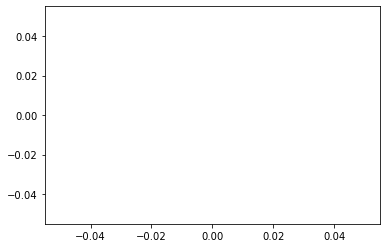

In [2]:
import matplotlib.pyplot as plt
plt.plot(figsize = (20,7))
plt.scatter(Y_test, testpredictions, color='b',s=20)
plt.plot(Y_test, Y_test, 'r')
plt.show()

In [1]:

plt.plot(forecast_prediction)

NameError: name 'plt' is not defined